In [1]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
#import dataset
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#check all the rows and columns
leads.shape

(9240, 37)

In [4]:
#check the datatype of all the columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## EDA - Data Cleaning & Treatment

In [5]:
#Converting all the 'Select' values to NaN
leads = leads.replace('Select', np.nan)

In [6]:
#Checking the number of null values in all the columns
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
#percentage of null values in all the columns
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
#drop the columns which have null values more than 40% also dropping the 'ProspectID' and 'Lead Number' as they have unique values
leads.drop(['Prospect ID', 'Lead Number', 'How did you hear about X Education',
            'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 
            'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
            'Asymmetrique Profile Score'], 1, inplace = True)

In [9]:
# rechecking percentage of null values in all the columns
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [10]:
#check all the rows and columns of modified dataset
leads.shape

(9240, 28)

In [11]:
#checking for rows which have more than 15 null values
qty_of_nuls = 1
leads.iloc[leads[(leads.isnull().sum(axis=1) >=qty_of_nuls)].index]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified
5,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,...,No,No,No,NaN,No,No,NaN,No,No,Modified
7,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,...,No,No,No,NaN,No,No,NaN,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9217,API,Olark Chat,No,No,0,0.0,0,0.0,SMS Sent,NaN,...,No,No,No,Ringing,No,No,NaN,No,No,SMS Sent
9218,Landing Page Submission,Google,Yes,No,0,1.0,149,1.0,Email Bounced,India,...,No,No,No,NaN,No,No,Mumbai,No,No,Modified
9226,API,Olark Chat,No,No,0,0.0,0,0.0,SMS Sent,NaN,...,No,No,No,Ringing,No,No,NaN,No,No,Modified
9233,API,Direct Traffic,No,No,1,13.0,1409,2.6,SMS Sent,India,...,No,No,No,Will revert after reading the email,No,No,NaN,No,No,SMS Sent


##### No empty rows present in the dataset

In [12]:
#checking value counts of 'Country' column
leads['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
South Africa               4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
Italy                      2
Belgium                    2
Netherlands                2
Asia/Pacific Region        2
China                      2
Uganda                     2
Ghana                      2
Philippines                2
Bangladesh                 2
Vietnam                    1
Liberia                    1
Tanzania                   1
Denmark                    1
Malaysia                   1
Russia        

In [13]:
# Since 'India' has the maximum number of values, replacing the NaN values to 'India'
leads['Country'] = leads['Country'].replace(np.nan, 'India')

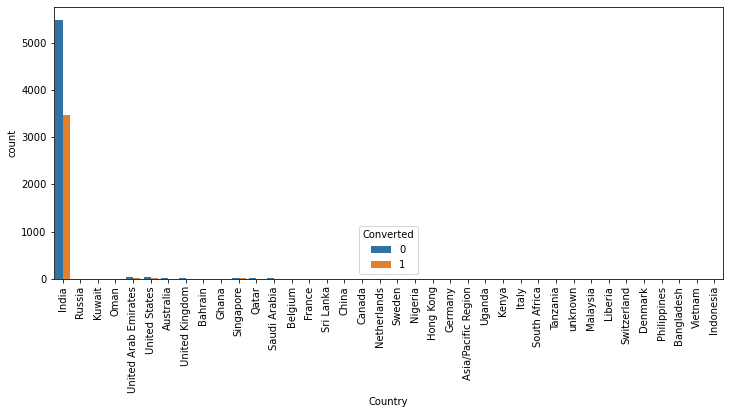

In [14]:
#plotting spread of Country columnn

plt.figure(figsize=(12,5))
s1=sns.countplot(leads.Country, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

###### As we can see the Number of Values for India are quite high (nearly 97% of the Data)

In [15]:
#checking value counts of 'City' column
leads['City'].value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [16]:
# Since 'Mumbai' has the maximum number of values after NaN, replacing the NaN values to 'Mumbai'
leads['City'] = leads['City'].replace(np.nan, 'Mumbai')

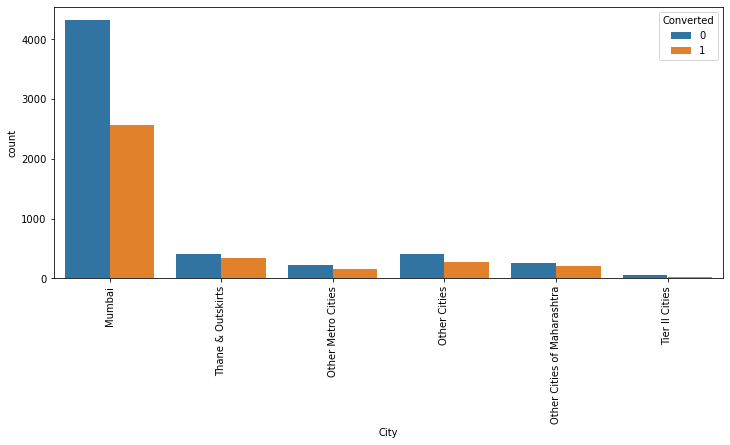

In [17]:
#plotting spread of 'City' columnn
plt.figure(figsize=(12,5))
s1=sns.countplot(leads.City, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [18]:
#Checking the value counts for 'Specialization column'
leads['Specialization'].value_counts(dropna= False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [19]:
#Converting all the NaN values with NA for graphical visualization
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'NA')

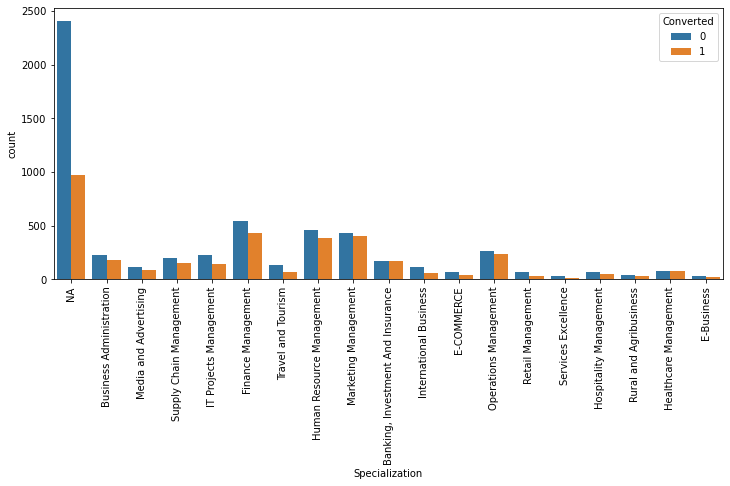

In [20]:
#Plotting spread of Specialization Column
plt.figure(figsize=(12,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [21]:
#combining Management - Specializations because they show similar trends
leads['Specialization'] = leads['Specialization'].replace(['Supply Chain Management', 'IT Projects Management', 'Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management', 'Retail Management', 'Hospitality Management', 'Healthcare Management'], 'Management')

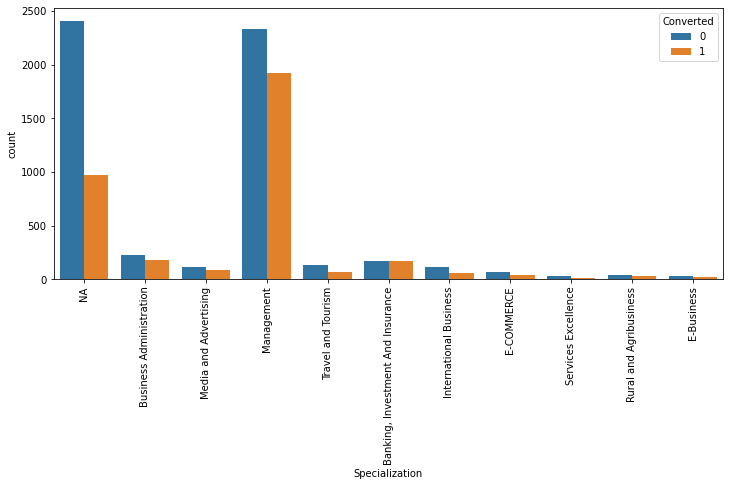

In [22]:
#Plotting spread of Specialization Column after modification
plt.figure(figsize=(12,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [23]:
#Checking the value counts of 'What is your current occupation' Column
leads['What is your current occupation'].value_counts(dropna= False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [24]:
#replacing all the 'NaN' values with 'Unemployed' as it has the  maximum number of values
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

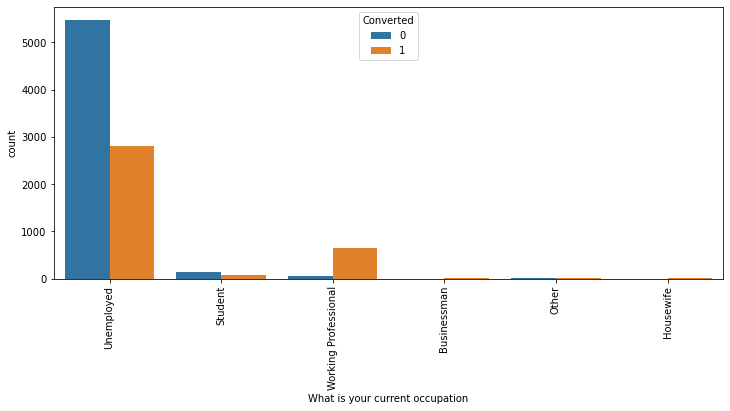

In [25]:
#Plotting the spread after modification
plt.figure(figsize=(12,5))
s1=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in terms of Absolute numbers.

In [26]:
#Checking the value counts of 'What matters most to you in choosing a course' column 
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [27]:
#Replacing all the NaN values with 'Better Career Prospects' as it has highest number of values
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

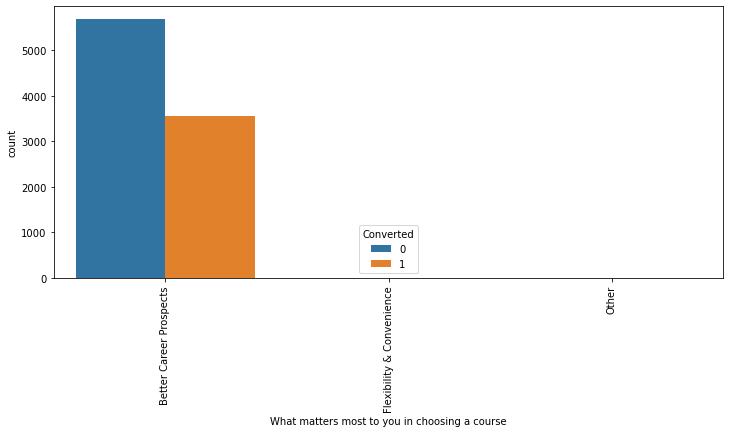

In [28]:
#Plotting the graph spread
plt.figure(figsize=(12,5))
s1=sns.countplot(leads['What matters most to you in choosing a course'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [29]:
#Checking all the value counts of 'Tags' column
leads.Tags.value_counts(dropna= False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [30]:
#Replacing the 'NaN' values with "NA" for visualization
leads['Tags'] = leads['Tags'].replace(np.nan, 'NA')

In [31]:
#Finding out the converted leads by Tagsx
a = leads['Converted'].groupby(leads['Tags']).sum().reset_index()
a

,Tags,Converted
0,Already a student,3
1,Busy,105
2,Closed by Horizzon,356
3,Diploma holder (Not Eligible),1
4,Graduation in progress,7
5,In confusion whether part time or DLP,1
6,Interested in full time MBA,3
7,Interested in Next batch,5
8,Interested in other courses,13
9,Lateral student,3


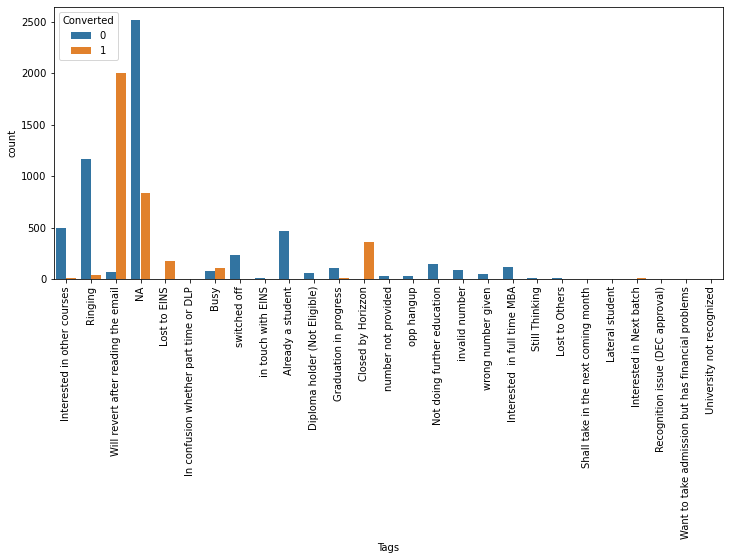

In [32]:
##visualizing count of Variable based on Converted value
plt.figure(figsize=(12,5))
s1=sns.countplot(leads['Tags'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [33]:
#Replacing all the leass important tags as 'Other tags'
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'switched off',
                                       'in touch with EINS', 'Already a student',
                                       'Diploma holder (Not Eligible)', 'Graduation in progress',
                                       'number not provided', 'opp hangup', 'Not doing further education',
                                       'invalid number', 'wrong number given', 'Interested  in full time MBA',
                                       'Still Thinking', 'Lost to Others', 'Lateral student',
                                       'Recognition issue (DEC approval)',
                                       'Want to take admission but has financial problems',
                                       'University not recognized', 'Interested in Next batch',
                                       'Shall take in the next coming month'], 'Other tags')

In [34]:
#Checking the value counts of Tags column
leads.Tags.value_counts(dropna= False)

NA                                     3353
Will revert after reading the email    2072
Other tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

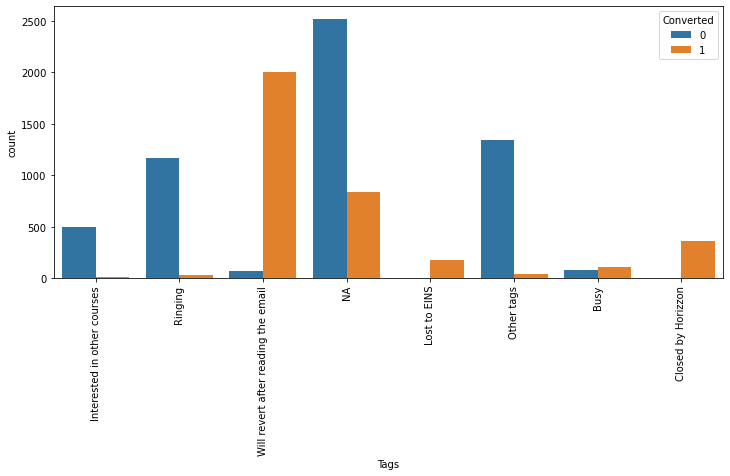

In [35]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(12,5))
s1=sns.countplot(leads['Tags'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [36]:
#Checking the value counts of 'last Activity'
leads['Last Activity'].value_counts(dropna= False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

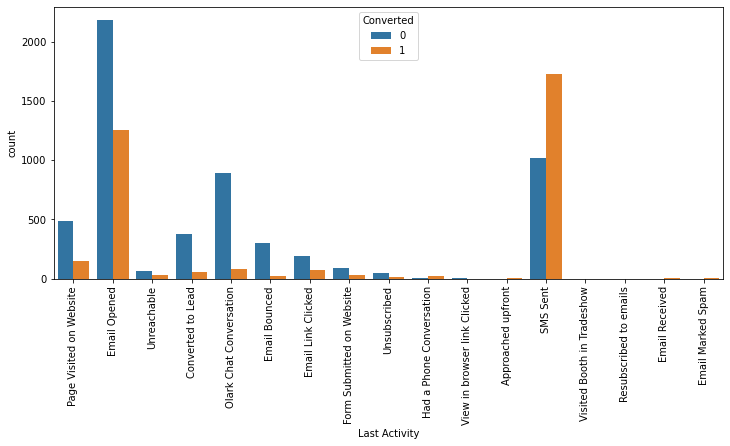

In [37]:
#visualizing count of Variable of Last Activity

plt.figure(figsize=(12,5))
s1=sns.countplot(leads['Last Activity'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [38]:
#Replacing the NaN values with 'NA'
leads['Last Activity'] = leads['Last Activity'].replace(np.nan, 'NA')

In [39]:
#Converting the lesser important activities with 'Other Activities'
leads['Last Activity'] = leads['Last Activity'].replace(['Unsubscribed', 'Unreachable', 'Had a Phone Conversation',
                                                         'View in browser link Clicked', 'Approached upfront',
                                                         'Visited Booth in Tradeshow', 'Resubscribed to emails',
                                                         'Email Marked Spam', 'Email Received', 'NA'], 'Other Activities')

In [40]:
#Checking the value counts
leads['Last Activity'].value_counts(dropna= False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Other Activities              308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

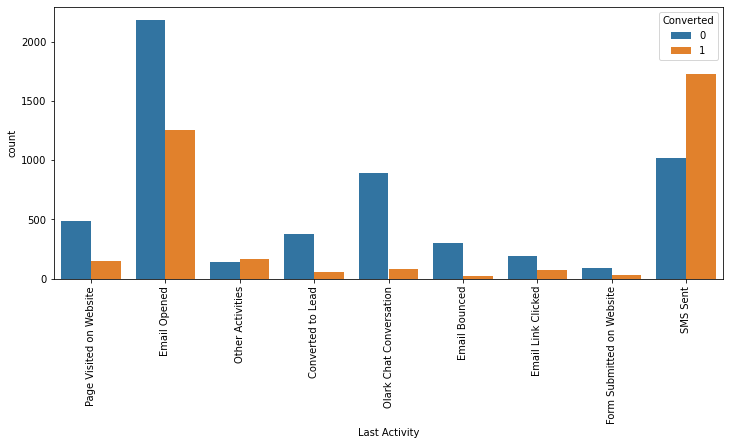

In [41]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(12,5))
s1=sns.countplot(leads['Last Activity'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [42]:
#Checking the value counts of 'Lead Origin'
leads['Lead Origin'].value_counts(dropna= False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [43]:
#Replacing the 'Quick Add Form' with 'Lead Add Form'
leads['Lead Origin'] = leads['Lead Origin'].replace('Quick Add Form', 'Lead Add Form')

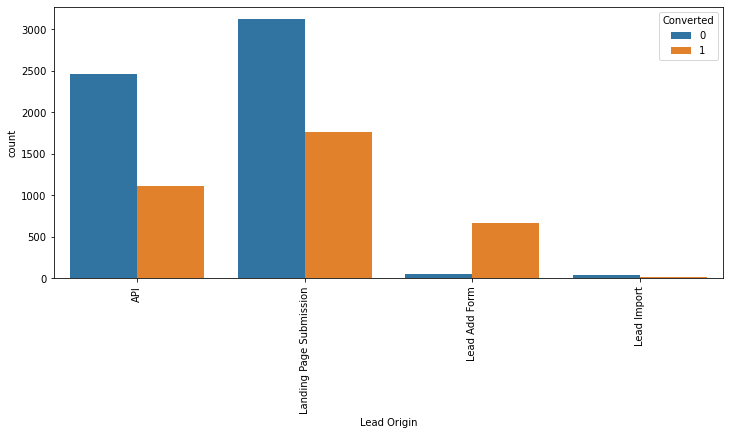

In [44]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(12,5))
s1=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Inference
- API and Landing Page Submission bringing higher number of leads as well as conversion.
- Lead Add Form has a very high conversion rate but count of leads are not very high.
- Lead Import and Quick Add Form get less leads.
- In order to improve overall lead conversion rate, improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

In [45]:
#Checking the value counts of 'Lead Source'
leads['Lead Source'].value_counts(dropna= False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
welearnblog_Home        1
blog                    1
youtubechannel          1
testone                 1
NC_EDM                  1
WeLearn                 1
Name: Lead Source, dtype: int64

In [46]:
#Replacing the values according to relevent categories
leads['Lead Source'] = leads['Lead Source'].replace(np.nan, 'NA')
leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook', 'Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing', 'NA',  'Click2call', 'Press_Release', 'Live Chat',
                                                     'Pay per Click Ads', 'blog', 'youtubechannel', 'WeLearn', 'testone',
                                                     'welearnblog_Home', 'NC_EDM'], 'Others')

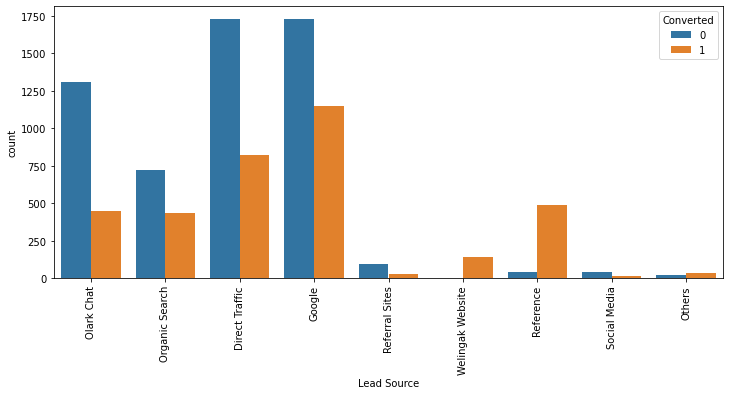

In [47]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(12,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [48]:
#Checking the value counts of 'Do Not Call' Column
leads['Do Not Call'].value_counts(dropna= False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

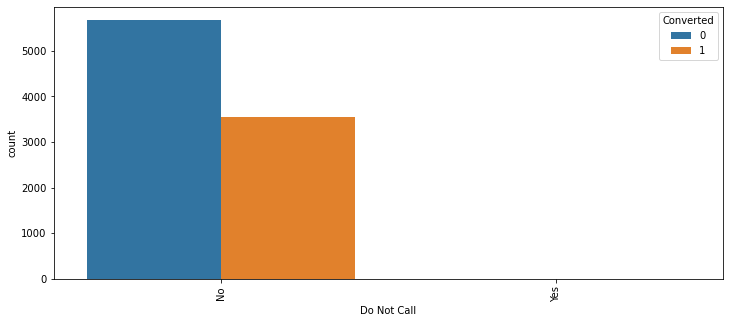

In [49]:
#Visualization of 'Do Not Call' column 
plt.figure(figsize=(12,5))
s1=sns.countplot(leads['Do Not Call'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [50]:
#Checking the value counts of 'Do Not Email' Column

leads['Do Not Email'].value_counts(dropna= False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

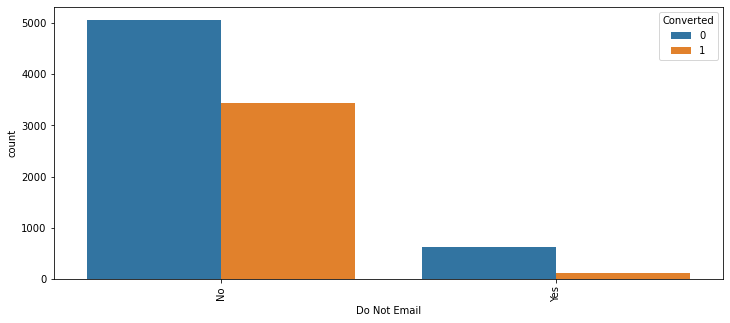

In [51]:
#Visualization of 'Do Not Email' column 
plt.figure(figsize=(12,5))
s1=sns.countplot(leads['Do Not Email'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [52]:
#Checking the value counts of 'Newspaper Article' Column
leads['Newspaper Article'].value_counts(dropna= False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [53]:
#Checking the value counts of 'X Education Forums' Column
leads['X Education Forums'].value_counts(dropna= False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [54]:
#Checking the value counts of 'Newspaper' Column
leads['Newspaper'].value_counts(dropna= False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [55]:
#Checking the value counts of 'Digital Advertisement' Column
leads['Digital Advertisement'].value_counts(dropna= False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [56]:
#Checking the value counts of 'Through Recommendations' Column
leads['Through Recommendations'].value_counts(dropna= False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [57]:
#Checking the value counts of 'Receive More Updates About Our Courses' Column
leads['Receive More Updates About Our Courses'].value_counts(dropna= False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

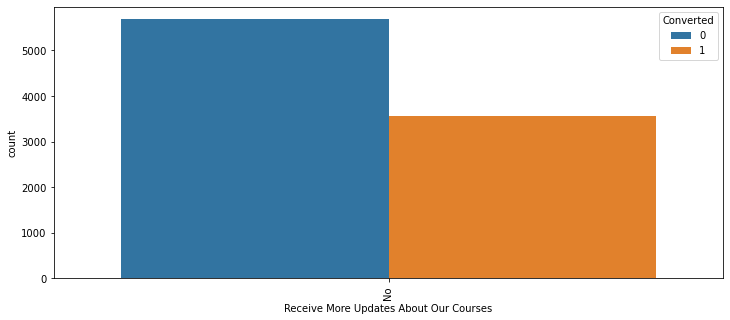

In [58]:
#Visualization of 'Receive More Updates About Our Courses' Column
plt.figure(figsize=(12,5))
s1=sns.countplot(leads['Receive More Updates About Our Courses'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [59]:
#Checking the value counts of 'Update me on Supply Chain Content' Column
leads['Update me on Supply Chain Content'].value_counts(dropna= False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [60]:
#Checking the value counts of 'Get updates on DM Content' Column
leads['Get updates on DM Content'].value_counts(dropna= False)

No    9240
Name: Get updates on DM Content, dtype: int64

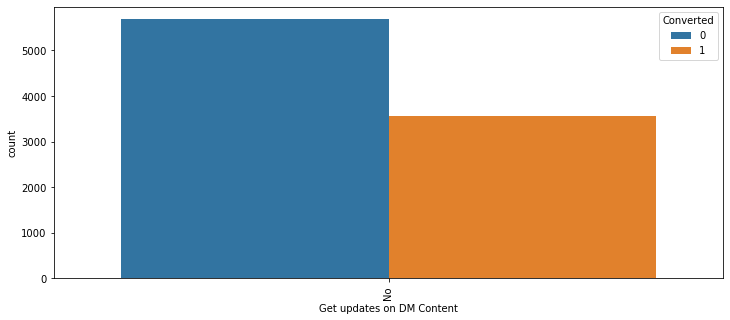

In [61]:
#Visualization of 'Get updates on DM Content' Column

plt.figure(figsize=(12,5))
s1=sns.countplot(leads['Get updates on DM Content'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [62]:
#Checking the value counts of 'I agree to pay the amount through cheque' Column
leads['I agree to pay the amount through cheque'].value_counts(dropna= False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

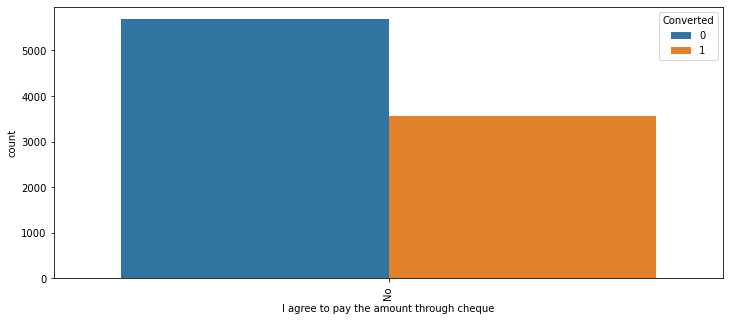

In [63]:
#Visualization of 'Get updates on DM Content' Column
plt.figure(figsize=(12,5))
s1=sns.countplot(leads['I agree to pay the amount through cheque'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [64]:
#Checking the value counts of 'A free copy of Mastering The Interview' Column
leads['A free copy of Mastering The Interview'].value_counts(dropna= False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

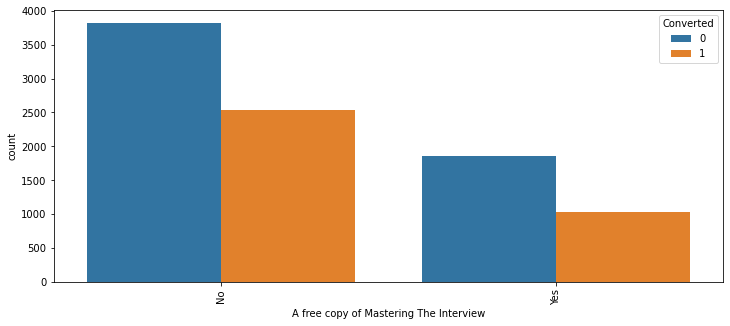

In [65]:
#Visualization of 'A free copy of Mastering The Interview' Column

plt.figure(figsize=(12,5))
s1=sns.countplot(leads['A free copy of Mastering The Interview'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [66]:
#Checking the value counts of 'Last Notable Activity' Column

leads['Last Notable Activity'].value_counts(dropna= False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
View in browser link Clicked       1
Resubscribed to emails             1
Approached upfront                 1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

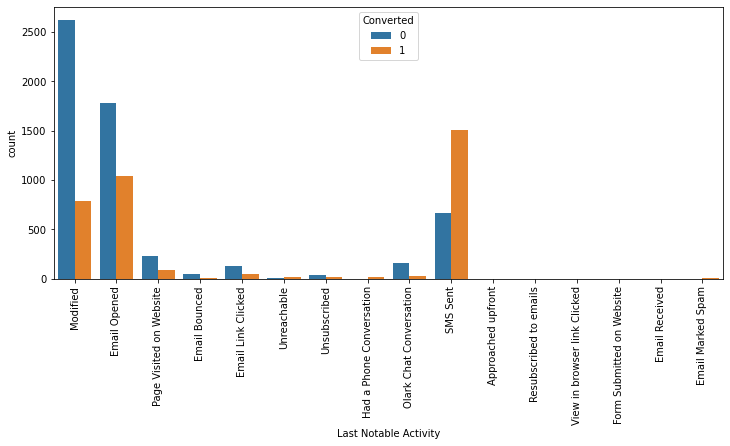

In [67]:
#Visualization of 'Last Notable Activity' Column
plt.figure(figsize=(12,5))
s1=sns.countplot(leads['Last Notable Activity'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [68]:
#Replacing all the lesser important values with 'Other Activities'
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Bounced', 'Unreachable', 
                                                                         'Unsubscribed', 'Had a Phone Conversation', 
                                                                         'Approached upfront', 'Resubscribed to emails', 
                                                                         'View in browser link Clicked', 
                                                                         'Form Submitted on Website', 'Email Received', 
                                                                         'Email Marked Spam'], 'Other Activities')

In [69]:
#Checking the value counts of 'Last Notable Activity' Column
leads['Last Notable Activity'].value_counts(dropna= False)

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other Activities            160
Name: Last Notable Activity, dtype: int64

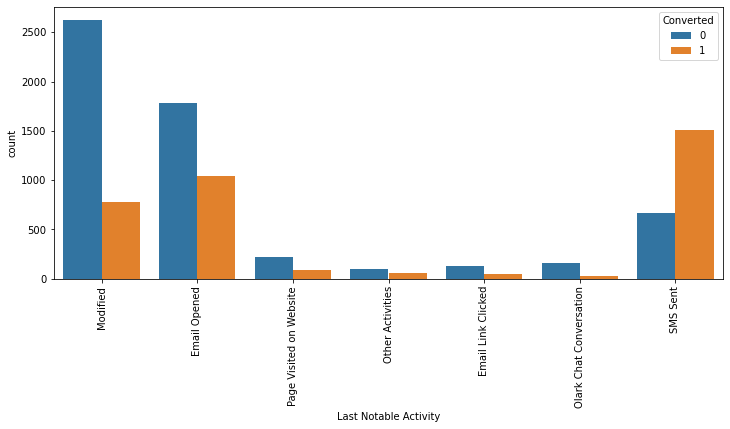

In [70]:
#Visualization of 'Last Notable Activity' Column
plt.figure(figsize=(12,5))
s1=sns.countplot(leads['Last Notable Activity'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [71]:
#getting the list of all the columns
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [72]:
#making a list of all the columns to drop as they cannot be used for data modelling
col_drop = ['Country', 'What matters most to you in choosing a course','Search', 'Magazine',
            'Do Not Email', 'Do Not Call','Newspaper Article', 'X Education Forums', 
            'Newspaper','Digital Advertisement','Through Recommendations', 
            'Receive More Updates About Our Courses','Update me on Supply Chain Content', 
            'Get updates on DM Content','City','I agree to pay the amount through cheque']

In [73]:
leads = leads.drop(col_drop, 1)

In [74]:
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NA,Unemployed,Interested in other courses,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,NA,Unemployed,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other Activities,Media and Advertising,Unemployed,Ringing,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,NA,Unemployed,Will revert after reading the email,No,Modified


In [75]:
#Checking the rows and columns of the modified data
leads.shape

(9240, 12)

In [76]:
#Checking the null values of data
leads.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                               0
Specialization                              0
What is your current occupation             0
Tags                                        0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [77]:
#removing all the rows containing Null values in the column of "TotalVisits"
leads = leads[~pd.isnull(leads['TotalVisits'])]

In [78]:
#Checking the null values of data
leads.isnull().sum()

Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

<Figure size 864x864 with 0 Axes>

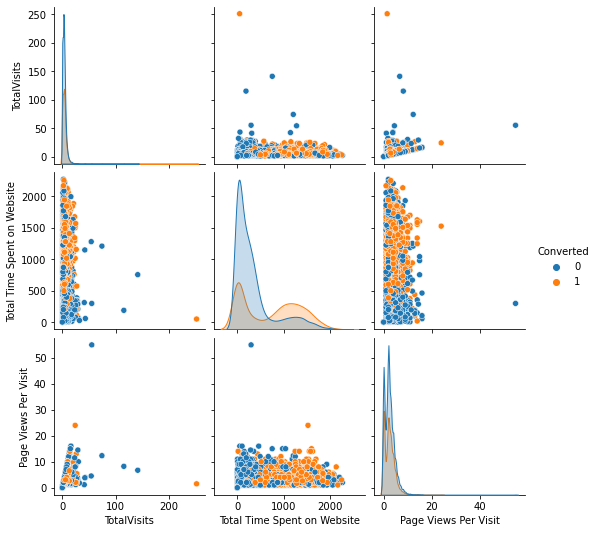

In [79]:
#Checking correlation of numeric values with respect to 'Converted' values
plt.figure(figsize=(12, 12))
sns.pairplot(leads, hue= 'Converted')
plt.show()

In [80]:
#Checking for description of 'TotalVisits' Column
leads['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

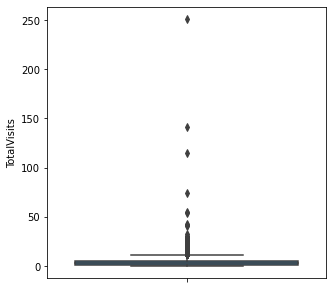

In [81]:
#Checking for outliers using boxplot
plt.figure(figsize=(5, 5))
sns.boxplot(y =leads.TotalVisits)
plt.show()

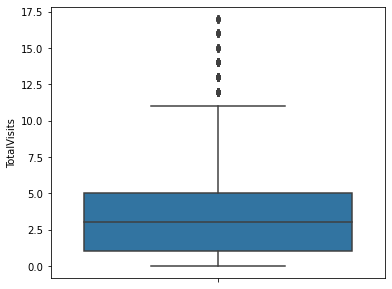

In [82]:
#removing the outlers above 0.99 and 0.01 quantile range
q9 = leads['TotalVisits'].quantile(0.99)
q1 = leads['TotalVisits'].quantile(0.01)
leads = leads[(leads['TotalVisits'] <= q9)]
leads = leads[(leads['TotalVisits'] >= q1)]
plt.figure(figsize=(6,5))
sns.boxplot(y =leads.TotalVisits)
plt.show()

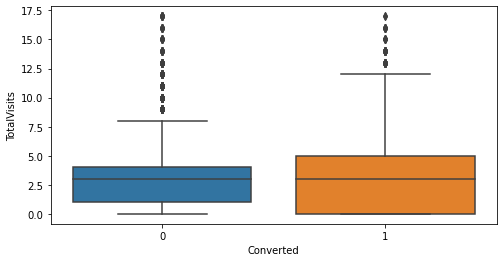

In [83]:
#Comparing the values of column 'TotalVisits' with 'Converted' values
plt.figure(figsize=(8, 4))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

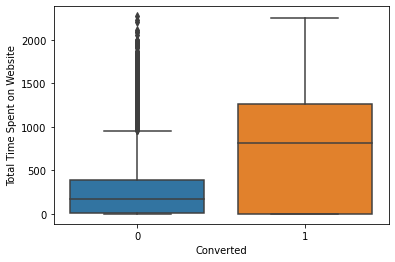

In [84]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

Inference

- Leads spending more time on the website are more likely to be converted.
- Website should be made more engaging to make leads spend more time

<Figure size 864x864 with 0 Axes>

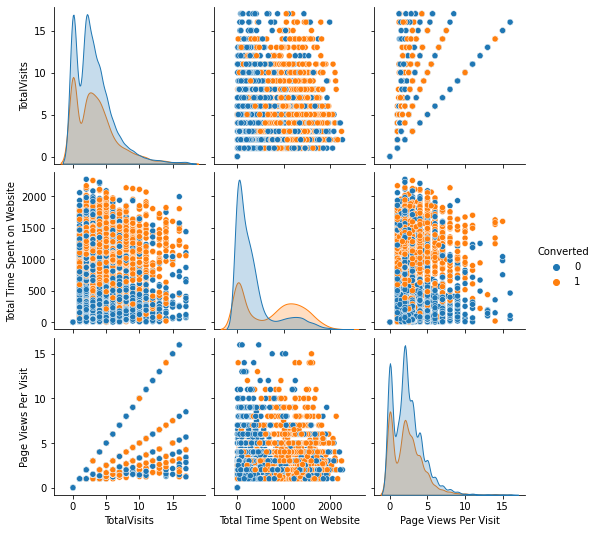

In [85]:
#Checking correlation of numeric values with respect to 'Converted' values after removal of outliers
plt.figure(figsize=(12, 12))
sns.pairplot(leads, hue= 'Converted')
plt.show()

#### Dummy Variable Creation

In [86]:
#Creating dummy variables and adding them to list and removing the original columns
dummy_leads = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 'Tags', 'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first= True)
dummy_specialization = pd.get_dummies(leads['Specialization'])
dummy_specialization = dummy_specialization.drop(['NA'], 1)
leads = pd.concat([leads, dummy_leads, dummy_specialization], axis=1)
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
leads

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,International Business,Management,Media and Advertising,Rural and Agribusiness,Services Excellence,Travel and Tourism
0,0,0.0,0,0.00,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9238,1,3.0,499,3.00,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


### Train - Test split

In [87]:
#Removing response variable from X
X = leads.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,International Business,Management,Media and Advertising,Rural and Agribusiness,Services Excellence,Travel and Tourism
0,0.0,0,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2.0,1428,1.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
# Putting response variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [89]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size= 0.3, random_state=100)

#### Scaling Data

In [90]:
#scaling numeric columns
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,International Business,Management,Media and Advertising,Rural and Agribusiness,Services Excellence,Travel and Tourism
2873,0.235294,0.250000,0.219263,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6823,0.411765,0.437500,0.790058,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
7258,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8327,0.470588,0.166875,0.691522,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5940,0.058824,0.062500,0.041722,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [91]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6314 entries, 2873 to 5783
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6314 non-null   float64
 1   Total Time Spent on Website                           6314 non-null   float64
 2   Page Views Per Visit                                  6314 non-null   float64
 3   Lead Origin_Landing Page Submission                   6314 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6314 non-null   uint8  
 5   Lead Origin_Lead Import                               6314 non-null   uint8  
 6   Lead Source_Google                                    6314 non-null   uint8  
 7   Lead Source_Olark Chat                                6314 non-null   uint8  
 8   Lead Source_Organic Search                            6

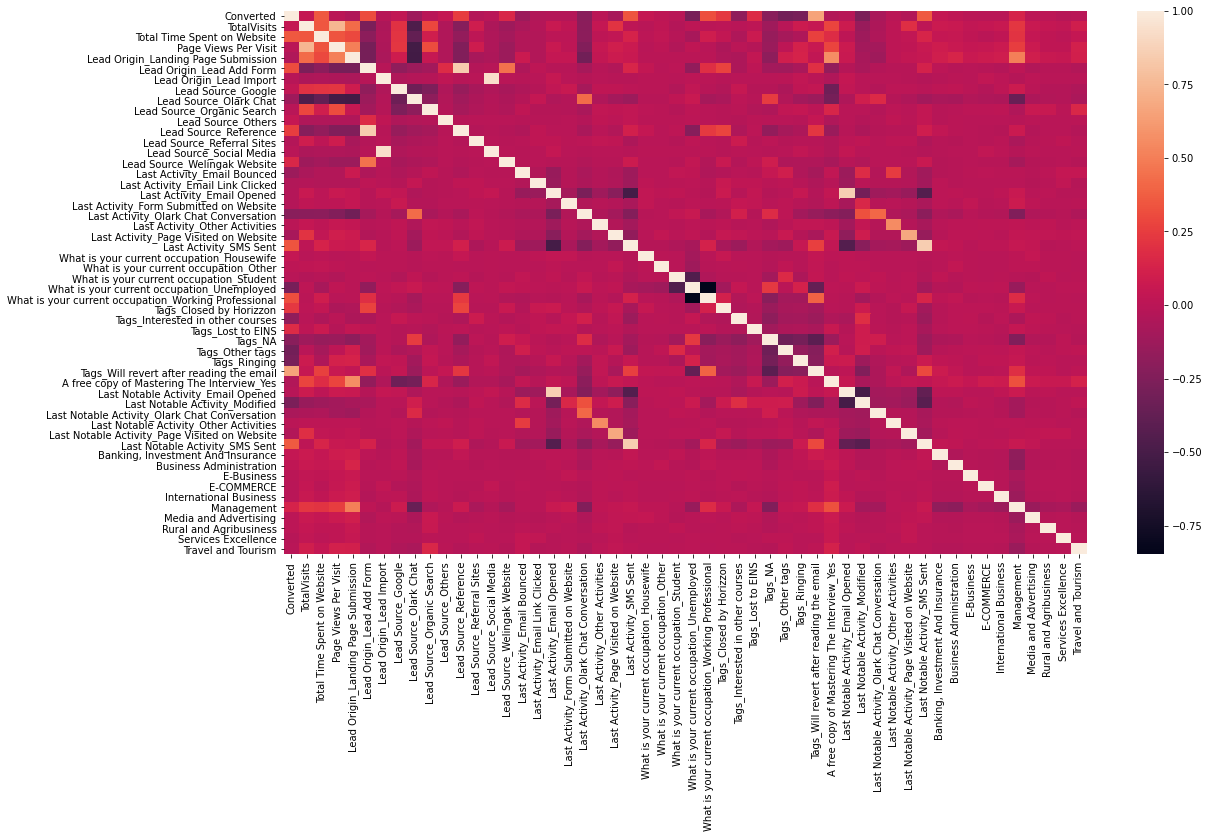

In [92]:
# Looking at the correlation table
plt.figure(figsize=(18, 10))
sns.heatmap(leads.corr())
plt.show()

In [93]:
#create a LogisticRegression object
lgr  = LogisticRegression()

In [94]:
# Import RFE and select 15 variables
rfe = RFE(lgr, 15)
rfe = rfe.fit(X_train, y_train)

In [95]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 20),
 ('Lead Source_Google', False, 31),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 36),
 ('Lead Source_Others', False, 6),
 ('Lead Source_Reference', False, 11),
 ('Lead Source_Referral Sites', False, 32),
 ('Lead Source_Social Media', False, 24),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 2),
 ('Last Activity_Email Link Clicked', False, 21),
 ('Last Activity_Email Opened', False, 8),
 ('Last Activity_Form Submitted on Website', False, 10),
 ('Last Activity_Olark Chat Conversation', False, 4),
 ('Last Activity_Other Activities', False, 9),
 ('Last Activity_Page Visited on Website', False, 33),
 ('Last Activity_SMS Sent', True, 1),
 ('What is your current occupation_Housewife', Fal

In [96]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

In [97]:
#list of RFE unsupported columns
X_train.columns[~rfe.support_]

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activities',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'Tags_NA',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Other Activities',
       'Last Notable Activity_Page Visite

### Manual Elimination

#### Model 1

In [98]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6298
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1240.0
Date:                Mon, 10 Jan 2022   Deviance:                       2479.9
Time:                        12:59:55   Pearson chi2:                 1.02e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7033      0.164    -16.488      0.000      -3.025      -2.382
TotalVisits                                              1.2605      0.430      2.935      0.003       0.419       2.102
Total Time Spent on Website                             -1.4407      0.643     -2.241      0.025      -2.701      -0.181
Page Views Per Visit                                     4.4214      0.251     17.613      0.000       3.929       4.913
Lead Origin_Lead Add Form                                2.0497      0.444      4.620      0.000       1.180       2.919
Lead Source_Olark Chat                                   1.1999      0.177      6.790      0.000       0.854       1.546
Lead Source_Welingak Website                             3.5121      0.849      4.137      0.000       1.848       5.176
Last Activity_SMS Sent                                   2.1653      0.117     18.448      0.000       1.935       2.395
What is your current occupation_Working Professional     1.0798      0.389      2.774      0.006       0.317       1.843
Tags_Closed by Horizzon                                  7.2491      1.023      7.083      0.000       5.243       9.255
Tags_Interested in other courses                        -1.9443      0.389     -4.998      0.000      -2.707      -1.182
Tags_Lost to EINS                                        5.9070      0.611      9.669      0.000       4.710       7.104
Tags_Other tags                                         -2.4733      0.212    -11.664      0.000      -2.889      -2.058
Tags_Ringing                                            -3.4749      0.244    -14.238      0.000      -3.953      -2.997
Tags_Will revert after reading the email                 4.4000      0.195     22.510      0.000       4.017       4.783
Last Notable Activity_Modified                          -1.7038      0.127    -13.370      0.000      -1.954      -1.454
========================================================================================================================
"""

In [99]:
# Check for the VIF values of the feature variables.
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,5.39
0,TotalVisits,4.82
2,Page Views Per Visit,2.27
13,Tags_Will revert after reading the email,2.09
3,Lead Origin_Lead Add Form,1.84
6,Last Activity_SMS Sent,1.60
14,Last Notable Activity_Modified,1.60
5,Lead Source_Welingak Website,1.35
7,What is your current occupation_Working Profes...,1.31
8,Tags_Closed by Horizzon,1.28


#### Model 2

In [100]:
#Dropping columns with high VIF values
col = col.drop('Total Time Spent on Website',1)

In [101]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1242.5
Date:                Mon, 10 Jan 2022   Deviance:                       2485.0
Time:                        12:59:56   Pearson chi2:                 1.04e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8309      0.154    -18.390      0.000      -3.133      -2.529
TotalVisits                                              0.7197      0.357      2.016      0.044       0.020       1.419
Page Views Per Visit                                     4.4208      0.251     17.643      0.000       3.930       4.912
Lead Origin_Lead Add Form                                2.2009      0.439      5.016      0.000       1.341       3.061
Lead Source_Olark Chat                                   1.3364      0.166      8.058      0.000       1.011       1.661
Lead Source_Welingak Website                             3.4945      0.849      4.116      0.000       1.830       5.159
Last Activity_SMS Sent                                   2.1385      0.116     18.359      0.000       1.910       2.367
What is your current occupation_Working Professional     1.0610      0.390      2.723      0.006       0.297       1.825
Tags_Closed by Horizzon                                  7.2446      1.023      7.083      0.000       5.240       9.249
Tags_Interested in other courses                        -1.9434      0.390     -4.980      0.000      -2.708      -1.179
Tags_Lost to EINS                                        5.8981      0.608      9.695      0.000       4.706       7.091
Tags_Other tags                                         -2.4705      0.212    -11.657      0.000      -2.886      -2.055
Tags_Ringing                                            -3.4994      0.244    -14.331      0.000      -3.978      -3.021
Tags_Will revert after reading the email                 4.3863      0.195     22.485      0.000       4.004       4.769
Last Notable Activity_Modified                          -1.7140      0.127    -13.458      0.000      -1.964      -1.464
========================================================================================================================
"""

In [102]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Page Views Per Visit,2.24
0,TotalVisits,2.21
12,Tags_Will revert after reading the email,2.08
2,Lead Origin_Lead Add Form,1.82
5,Last Activity_SMS Sent,1.56
13,Last Notable Activity_Modified,1.56
4,Lead Source_Welingak Website,1.35
6,What is your current occupation_Working Profes...,1.31
7,Tags_Closed by Horizzon,1.28
10,Tags_Other tags,1.25


#### Model 3

In [103]:
#Dropping the 'totalVisits' column as it has high VIF value
col = col.drop('TotalVisits',1)

In [104]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1244.5
Date:                Mon, 10 Jan 2022   Deviance:                       2489.0
Time:                        12:59:56   Pearson chi2:                 1.01e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6480      0.123    -21.577      0.000      -2.888      -2.407
Page Views Per Visit                                     4.4565      0.250     17.840      0.000       3.967       4.946
Lead Origin_Lead Add Form                                2.0481      0.431      4.756      0.000       1.204       2.892
Lead Source_Olark Chat                                   1.1783      0.145      8.140      0.000       0.895       1.462
Lead Source_Welingak Website                             3.4791      0.849      4.099      0.000       1.816       5.143
Last Activity_SMS Sent                                   2.1258      0.116     18.296      0.000       1.898       2.354
What is your current occupation_Working Professional     1.0378      0.389      2.666      0.008       0.275       1.801
Tags_Closed by Horizzon                                  7.2521      1.022      7.095      0.000       5.249       9.255
Tags_Interested in other courses                        -1.9529      0.391     -4.994      0.000      -2.719      -1.186
Tags_Lost to EINS                                        5.9188      0.610      9.708      0.000       4.724       7.114
Tags_Other tags                                         -2.4768      0.212    -11.685      0.000      -2.892      -2.061
Tags_Ringing                                            -3.4929      0.244    -14.303      0.000      -3.972      -3.014
Tags_Will revert after reading the email                 4.3924      0.195     22.539      0.000       4.010       4.774
Last Notable Activity_Modified                          -1.7346      0.127    -13.669      0.000      -1.983      -1.486
========================================================================================================================
"""

In [105]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,2.01
0,Page Views Per Visit,1.91
1,Lead Origin_Lead Add Form,1.78
4,Last Activity_SMS Sent,1.54
12,Last Notable Activity_Modified,1.53
3,Lead Source_Welingak Website,1.35
5,What is your current occupation_Working Profes...,1.31
6,Tags_Closed by Horizzon,1.26
2,Lead Source_Olark Chat,1.19
9,Tags_Other tags,1.18


In [106]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2873    0.998667
6823    0.999384
7258    0.039005
8327    0.992047
5940    0.014823
5686    0.998902
5372    0.999717
4736    0.034601
5812    0.997415
893     0.032918
dtype: float64

In [107]:
#resahping into array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99866704, 0.9993837 , 0.03900541, 0.99204692, 0.01482324,
       0.99890245, 0.99971719, 0.03460121, 0.99741491, 0.0329178 ])

In [108]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.998667
1,1,0.999384
2,0,0.039005
3,1,0.992047
4,0,0.014823


In [109]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.998667,1
1,1,0.999384,1
2,0,0.039005,0
3,1,0.992047,1
4,0,0.014823,0


In [110]:
# Create confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3774  163]
 [ 299 2078]]


In [111]:
# Check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.926829268292683


In [112]:
# Evaluate the other metrics
TP = confusion[1,1] #true positive
TN = confusion[0,0] #true negative 
FP = confusion[0,1] #false positive
FN = confusion[1,0] #false negative

In [113]:
# Calculate the sensitivity
print(TP/(TP+FN))

0.8742111905763568


In [114]:
# Calculate the specificity
print(TN/(TN+FP))

0.9585979171958344


#### Find the optimal Cut-off

In [115]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [116]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

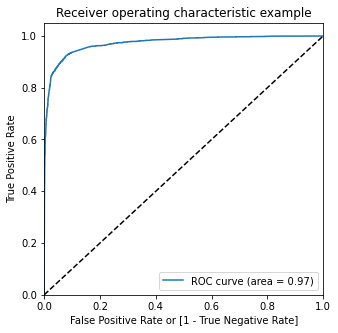

In [117]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.97 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [118]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.998667,1,1,1,1,1,1,1,1,1,1,1
1,1,0.999384,1,1,1,1,1,1,1,1,1,1,1
2,0,0.039005,0,1,0,0,0,0,0,0,0,0,0
3,1,0.992047,1,1,1,1,1,1,1,1,1,1,1
4,0,0.014823,0,1,0,0,0,0,0,0,0,0,0


In [119]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376465  1.000000  0.000000
0.1   0.1  0.829902  0.972234  0.743967
0.2   0.2  0.917010  0.933109  0.907290
0.3   0.3  0.922711  0.914178  0.927864
0.4   0.4  0.925245  0.899032  0.941072
0.5   0.5  0.926829  0.874211  0.958598
0.6   0.6  0.926988  0.851073  0.972822
0.7   0.7  0.913367  0.802692  0.980188
0.8   0.8  0.904815  0.773664  0.983998
0.9   0.9  0.885809  0.713504  0.989840


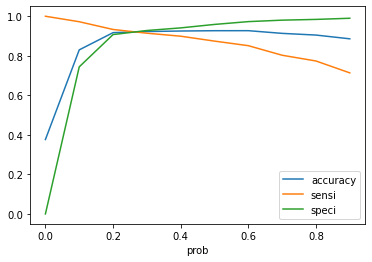

In [120]:
# Plot graph of accuracy, sensitivity, specificity
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Around 0.28, you get the optimal values of the three metrics. So let's choose 0.3 as our cutoff now.

In [121]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.998667,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.999384,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.039005,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.992047,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.014823,0,1,0,0,0,0,0,0,0,0,0,0


In [122]:
# Let's check the accuracy now
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9227114349065568

In [123]:
#Let's create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3653,  284],
       [ 204, 2173]], dtype=int64)

In [124]:
TP = confusion2[1,1] #true positive
TN = confusion2[0,0] #true negative
FP = confusion2[0,1] #false positive
FN = confusion2[1,0] #false negative

In [125]:
# Calculate Sensitivity
print(TP/(TP+FN))

0.9141775347076146


In [126]:
# Calculate Specificity
print(TN/(TN+FP))

0.9278638557277115


#### Observations
As we can see, above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:
- Accuracy : 92.27%
- Sensitivity : 91.41%
- Specificity : 92.78%

In [127]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/(TN+FP))

0.07213614427228854


In [128]:
# Positive predictive value 
print(TP /(TP+FP))

0.8844118844118845


In [129]:
# Negative predictive value
print(TN /(TN+FN))

0.9471091521908219


In [130]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3774  163]
 [ 299 2078]]


In [131]:
# Precision
print(TP / TP + FP)
confusion[1,1]/(confusion[0,1]+confusion[1,1])

285.0


0.927264614011602

In [132]:
# Recall
print(TP / TP + FN)
confusion[1,1]/(confusion[1,0]+confusion[1,1])

205.0


0.8742111905763568

In [133]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.Predicted)

0.927264614011602

In [134]:
recall_score(y_train_pred_final.Converted , y_train_pred_final.Predicted)

0.8742111905763568

In [135]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

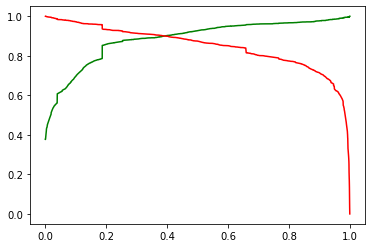

In [136]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [137]:
#scaling test set
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,International Business,Management,Media and Advertising,Rural and Agribusiness,Services Excellence,Travel and Tourism
5130,0.000000,0.000000,0.0000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6929,0.294118,0.012764,0.3125,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1484,0.235294,0.055018,0.2500,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6519,0.117647,0.695863,0.1250,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7472,0.117647,0.610035,0.1250,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [138]:
X_test = X_test[col]
X_test.head()

,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified
5130,0.0000,0,1,0,0,0,0,0,0,0,0,0,1
6929,0.3125,0,0,0,0,0,0,0,0,0,0,0,0
1484,0.2500,0,0,0,1,0,0,0,0,0,1,0,1
6519,0.1250,0,0,0,1,0,0,0,0,0,1,0,0
7472,0.1250,0,0,0,1,0,0,0,0,0,0,1,0


In [139]:
X_test_sm = sm.add_constant(X_test)

#### Predictions on Test set

In [140]:
y_test_pred = res.predict(X_test_sm)

In [141]:
y_test_pred[:10]

5130    0.039005
6929    0.221783
1484    0.009608
6519    0.030532
7472    0.988195
7920    0.177433
3962    0.186994
6135    0.039005
8701    0.859942
5461    0.991039
dtype: float64

In [142]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5130,0.039005
6929,0.221783
1484,0.009608
6519,0.030532
7472,0.988195


In [143]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [144]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [145]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [146]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,5130,0.039005
1,0,6929,0.221783
2,0,1484,0.009608
3,0,6519,0.030532
4,1,7472,0.988195


In [147]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,5130,0.039005
1,0,6929,0.221783
2,0,1484,0.009608
3,0,6519,0.030532
4,1,7472,0.988195


In [148]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,5130,0,0.039005,4
1,6929,0,0.221783,22
2,1484,0,0.009608,1
3,6519,0,0.030532,3
4,7472,1,0.988195,99


In [149]:

y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,5130,0,0.039005,4,0
1,6929,0,0.221783,22,0
2,1484,0,0.009608,1,0
3,6519,0,0.030532,3,0
4,7472,1,0.988195,99,1


In [150]:
# Overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9231337767923133

In [151]:
#Confusion Matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1574,   84],
       [ 124,  924]], dtype=int64)

In [152]:
TP = confusion2[1,1] #true positive
TN = confusion2[0,0] #true negative
FP = confusion2[0,1] #false positive
FN = confusion2[1,0] #false negative

In [153]:
#Sensitivity
print(TP /(TP+FN))

0.8816793893129771


In [154]:
#Specificity
print(TN /(TN+FP))

0.9493365500603136


In [155]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.9166666666666666

In [156]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8816793893129771

#### Observation:
- Accuracy : 92.31%
- Sensitivity : 88.16%
- Specificity : 94.93%

#### Final Observation:


Train Data: 
- Accuracy : 92.27%
- Sensitivity : 91.41%
- Specificity : 92.78%

Test Data: 
- Accuracy : 92.31%
- Sensitivity : 88.16%
- Specificity : 94.93%